In [1]:
import pandas as pd
import dask.dataframe as dd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#loading ACS data
usa_df = pd.read_csv("../data/raw/usa_00005-002/usa_00005-002.csv")

In [3]:
#creating a copy for manipulation
usa_df_cleaning = usa_df.copy()

In [4]:
usa_df_cleaning.YEAR.unique()

array([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018], dtype=int64)

In [5]:
usa_df_cleaning = usa_df_cleaning[["YEAR", "SAMPLE", "REGION", "STATEFIP", "COUNTYFIP", "HHINCOME", "SEX", "AGE", "MARST", 
                                   "RACE", "CITIZEN", "EDUC", "OCC2010", "CINETHH", "CILAPTOP", "CISMRTPHN", "CITABLET",
                                   "CIHAND", "CIHISPEED", "CISAT", "CIDIAL", "CIOTHSVC", "FAMSIZE"]]

In [6]:
#isolating years common to other data sets
usa_2011 = usa_df_cleaning[(usa_df_cleaning["YEAR"] == 2011)]
usa_2011 = usa_df_cleaning[(usa_df_cleaning["YEAR"] == 2012)]
usa_2013 = usa_df_cleaning[(usa_df_cleaning["YEAR"] == 2013)]
usa_2015 = usa_df_cleaning[(usa_df_cleaning["YEAR"] == 2015)]
usa_2017 = usa_df_cleaning[(usa_df_cleaning["YEAR"] == 2017)]
usa_2011 = usa_df_cleaning[(usa_df_cleaning["YEAR"] == 2018)]

In [7]:
#staging for concatenation
usa_years = [usa_2011, usa_2013, usa_2015, usa_2017]

In [8]:
#recombining dataframes
usa_df_cleaning = pd.concat(usa_years, axis=0)

In [9]:
usa_df_cleaning.isnull().sum()/len(usa_df_cleaning)*100

YEAR          0.000000
SAMPLE        0.000000
REGION        0.000000
STATEFIP      0.000000
COUNTYFIP     0.000000
HHINCOME      0.000000
SEX           0.000000
AGE           0.000000
MARST         0.000000
RACE          0.000000
CITIZEN       0.000000
EDUC          0.000000
OCC2010       0.000000
CINETHH       0.000000
CILAPTOP      0.000000
CISMRTPHN    49.508139
CITABLET     49.508139
CIHAND       50.491861
CIHISPEED     0.000000
CISAT         0.000000
CIDIAL        0.000000
CIOTHSVC      0.000000
FAMSIZE       0.000000
dtype: float64

<p>CISMRTPHN, CITABLET showing the same degree of missingness(75%)</p>
CINETHH, CILAPTOP, CIHISPEED, CISAT, CIDIAL, CIOTHSVC showing the same degree of missingness (25%).

In [10]:
#isolating and addressing columns with missing values
usa_df_missing = usa_df_cleaning[["CINETHH", "CILAPTOP", "CISMRTPHN", "CITABLET",
                                   "CIHAND", "CIHISPEED", "CISAT", "CIDIAL", "CIOTHSVC"]]

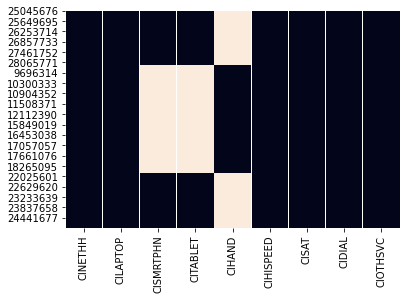

In [11]:
sns.heatmap(usa_df_missing.isnull(), cbar=False);

In [12]:
usa_df_missing.isnull().sum()/len(usa_df_missing)*100

CINETHH       0.000000
CILAPTOP      0.000000
CISMRTPHN    49.508139
CITABLET     49.508139
CIHAND       50.491861
CIHISPEED     0.000000
CISAT         0.000000
CIDIAL        0.000000
CIOTHSVC      0.000000
dtype: float64

It appears that the levels of missingness across variables may be uniform. Will confirm via manipulation and examination of indicies. 

In [13]:
usa_indicies = list(usa_df_missing.index)

In [14]:
usa_years = list(usa_df_cleaning.YEAR.unique())

In [15]:
for year in usa_years:
    #display(usa_df_cleaning[usa_df_cleaning.YEAR == year])
    print(f"----------------{year}----------------")
    print(usa_df_cleaning[usa_df_cleaning.YEAR == year].isnull().sum()/len(usa_df_cleaning[usa_df_cleaning.YEAR == year])*100, "\n")
    plt.show()

----------------2018----------------
YEAR           0.0
SAMPLE         0.0
REGION         0.0
STATEFIP       0.0
COUNTYFIP      0.0
HHINCOME       0.0
SEX            0.0
AGE            0.0
MARST          0.0
RACE           0.0
CITIZEN        0.0
EDUC           0.0
OCC2010        0.0
CINETHH        0.0
CILAPTOP       0.0
CISMRTPHN      0.0
CITABLET       0.0
CIHAND       100.0
CIHISPEED      0.0
CISAT          0.0
CIDIAL         0.0
CIOTHSVC       0.0
FAMSIZE        0.0
dtype: float64 

----------------2013----------------
YEAR           0.0
SAMPLE         0.0
REGION         0.0
STATEFIP       0.0
COUNTYFIP      0.0
HHINCOME       0.0
SEX            0.0
AGE            0.0
MARST          0.0
RACE           0.0
CITIZEN        0.0
EDUC           0.0
OCC2010        0.0
CINETHH        0.0
CILAPTOP       0.0
CISMRTPHN    100.0
CITABLET     100.0
CIHAND         0.0
CIHISPEED      0.0
CISAT          0.0
CIDIAL         0.0
CIOTHSVC       0.0
FAMSIZE        0.0
dtype: float64 

----------------20

In [16]:
usa_df_cleaning.shape

(12684379, 23)

In [17]:
usa_df_cleaning.to_csv("../data/processed/ACS_2011_2017_clean")